# Theory: Logistic Regression 📈🔍

Logistic Regression is a versatile and widely-used machine learning algorithm for solving classification tasks. It's like the "workhorse" of binary classification, helping you make decisions and predictions based on data! 🤖📊

## Introduction to Logistic Regression 📊🔍

Logistic Regression is a supervised learning algorithm used for binary and multi-class classification problems. Despite its name, it's not used for regression tasks but for estimating the probability of an input belonging to a particular class. It's a fundamental tool in the data scientist's toolkit! 📈✨

## How Logistic Regression Works 🧠📈

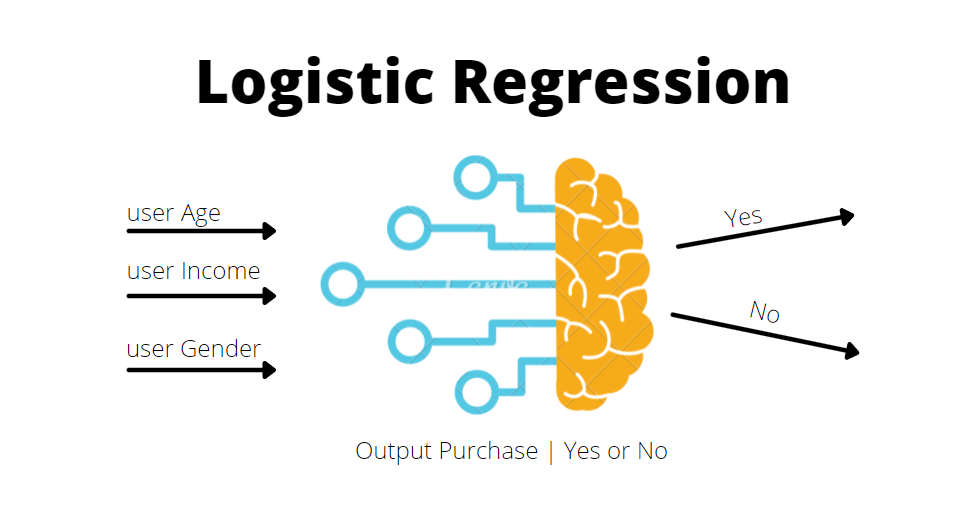

### Probability Estimation 🎲

Logistic Regression estimates the probability of a binary event using a logistic (sigmoid) function. The output of the function is constrained between 0 and 1, making it suitable for modeling probabilities. It's like predicting the likelihood of an event happening! 🎲🔮

### Logistic Function 📉

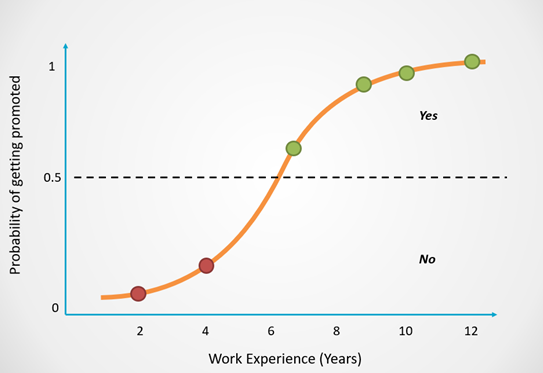

The logistic (sigmoid) function is represented as:

p(y=1|x) = 1 / (1 + e^(-z))

- `p(y=1|x)` is the probability of the target being class 1.
- `x` is the input feature(s).
- `e` is the base of the natural logarithm.
- `z` is a linear combination of input features and model parameters.

### Decision Boundary 📏

Logistic Regression uses a decision boundary to separate the classes. If the estimated probability is greater than a threshold (typically 0.5), the input is classified as class 1; otherwise, it's classified as class 0. It's like drawing a "line in the sand" to make predictions! 📏🏖️

## Advantages of Logistic Regression 🌈

Logistic Regression has several advantages:
1. **Interpretability**: The model is highly interpretable, making it suitable for understanding the impact of features on predictions.
2. **Efficiency**: It's computationally efficient and works well with large datasets.
3. **Probability Estimation**: It provides probability estimates, which can be useful for decision-making.

## Challenges and Considerations ⚠️

While Logistic Regression is a powerful tool, here are some considerations:
1. **Linear Decision Boundary**: It assumes a linear decision boundary, which may not hold in all cases.
2. **Imbalanced Data**: It can be sensitive to imbalanced class distributions.

## Tips for Using Logistic Regression Effectively 💡

1. Perform feature engineering to create meaningful input features.
2. Address class imbalance issues using techniques like oversampling or undersampling.
3. Tune hyperparameters, such as the regularization strength.

## Conclusion 🎉

Logistic Regression is a fundamental and valuable algorithm for solving classification problems. Its simplicity, interpretability, and efficiency make it a reliable choice for making binary or multi-class predictions based on data. Think of it as your trusty "data detective" for making classification decisions! 🕵️📊


# Importing Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

## Dataset
### Data Preprocessing
Data preprocessing is a crucial step in the machine learning pipeline. It is the step where we prepare our data for the model.

In [33]:
df = pd.read_csv('Iris.csv') # Load the data
df.sample(10) # Show 10 random rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
4,5,5.0,3.6,1.4,0.2,Iris-setosa
26,27,5.0,3.4,1.6,0.4,Iris-setosa
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
32,33,5.2,4.1,1.5,0.1,Iris-setosa
83,84,6.0,2.7,5.1,1.6,Iris-versicolor
36,37,5.5,3.5,1.3,0.2,Iris-setosa
118,119,7.7,2.6,6.9,2.3,Iris-virginica
61,62,5.9,3.0,4.2,1.5,Iris-versicolor
35,36,5.0,3.2,1.2,0.2,Iris-setosa
74,75,6.4,2.9,4.3,1.3,Iris-versicolor


In [34]:
df.rename({
    'SepalLengthCm': 'sepal_length',
    'SepalWidthCm': 'sepal_width',
    'PetalLengthCm': 'petal_length',
    'PetalWidthCm': 'petal_width',
    'Species': 'species'
}, axis=1, inplace=True) # Rename the columns

df.sample(5) # Show 5 random rows

,Id,sepal_length,sepal_width,petal_length,petal_width,species
134,135,6.1,2.6,5.6,1.4,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
37,38,4.9,3.1,1.5,0.1,Iris-setosa
51,52,6.4,3.2,4.5,1.5,Iris-versicolor
117,118,7.7,3.8,6.7,2.2,Iris-virginica


In [35]:
df.info() # Show the data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   150 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   150 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [36]:
df.shape # Show the number of rows and columns

(150, 6)

In [37]:
df.describe() # Show the descriptive statistics of the data

,Id,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [38]:
df.isnull().sum() # Show the number of missing values in each column

Id              0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [39]:
df.duplicated().sum() # Show the number of duplicated rows

0

In [40]:
df.corr(numeric_only=True) # Show the correlation between the numeric columns

,Id,sepal_length,sepal_width,petal_length,petal_width
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
sepal_length,0.716676,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.882747,0.871754,-0.420516,1.000000,0.962757
petal_width,0.899759,0.817954,-0.356544,0.962757,1.000000


## Data Visulization
Data visualization is the process of translating large data sets and metrics into charts, graphs and other visuals. The resulting visual representation of data makes it easier to identify and share real-time trends, outliers, and new insights about the information represented in the data.

### Bar Plot
Bar plots are used to compare different groups of data. They are also called bar graphs.

<Axes: xlabel='species', ylabel='sepal_length'>

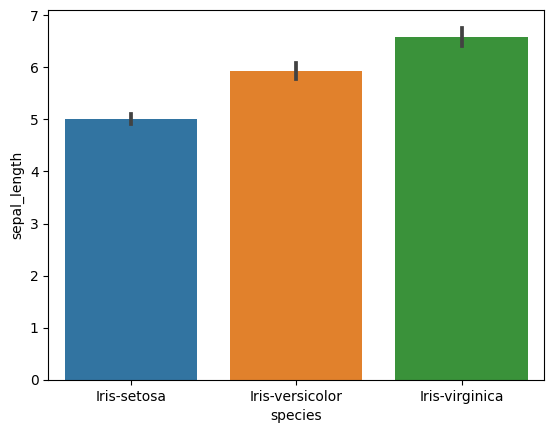

In [41]:
sns.barplot(x = df['species'], y = df['sepal_length']) # Show the barplot of the species and sepal length

<Axes: xlabel='species', ylabel='sepal_width'>

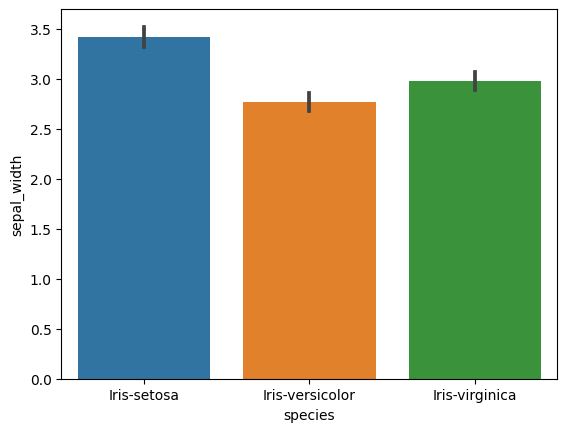

In [42]:
sns.barplot(x = df['species'], y = df['sepal_width']) # Show the barplot of the species and sepal width

<Axes: xlabel='species', ylabel='petal_length'>

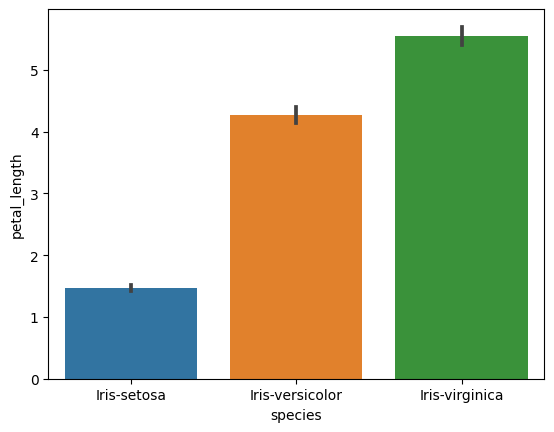

In [43]:
sns.barplot(x = df['species'], y = df['petal_length']) # Show the barplot of the species and petal length

<Axes: xlabel='species', ylabel='petal_width'>

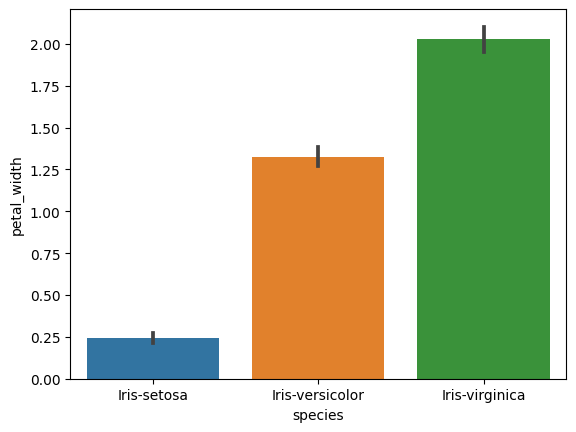

In [44]:
sns.barplot(x = df['species'], y = df['petal_width']) # Show the barplot of the species and petal width

## Box Plot
Box plots are used to compare different groups of data. They are also called box and whisker plots.

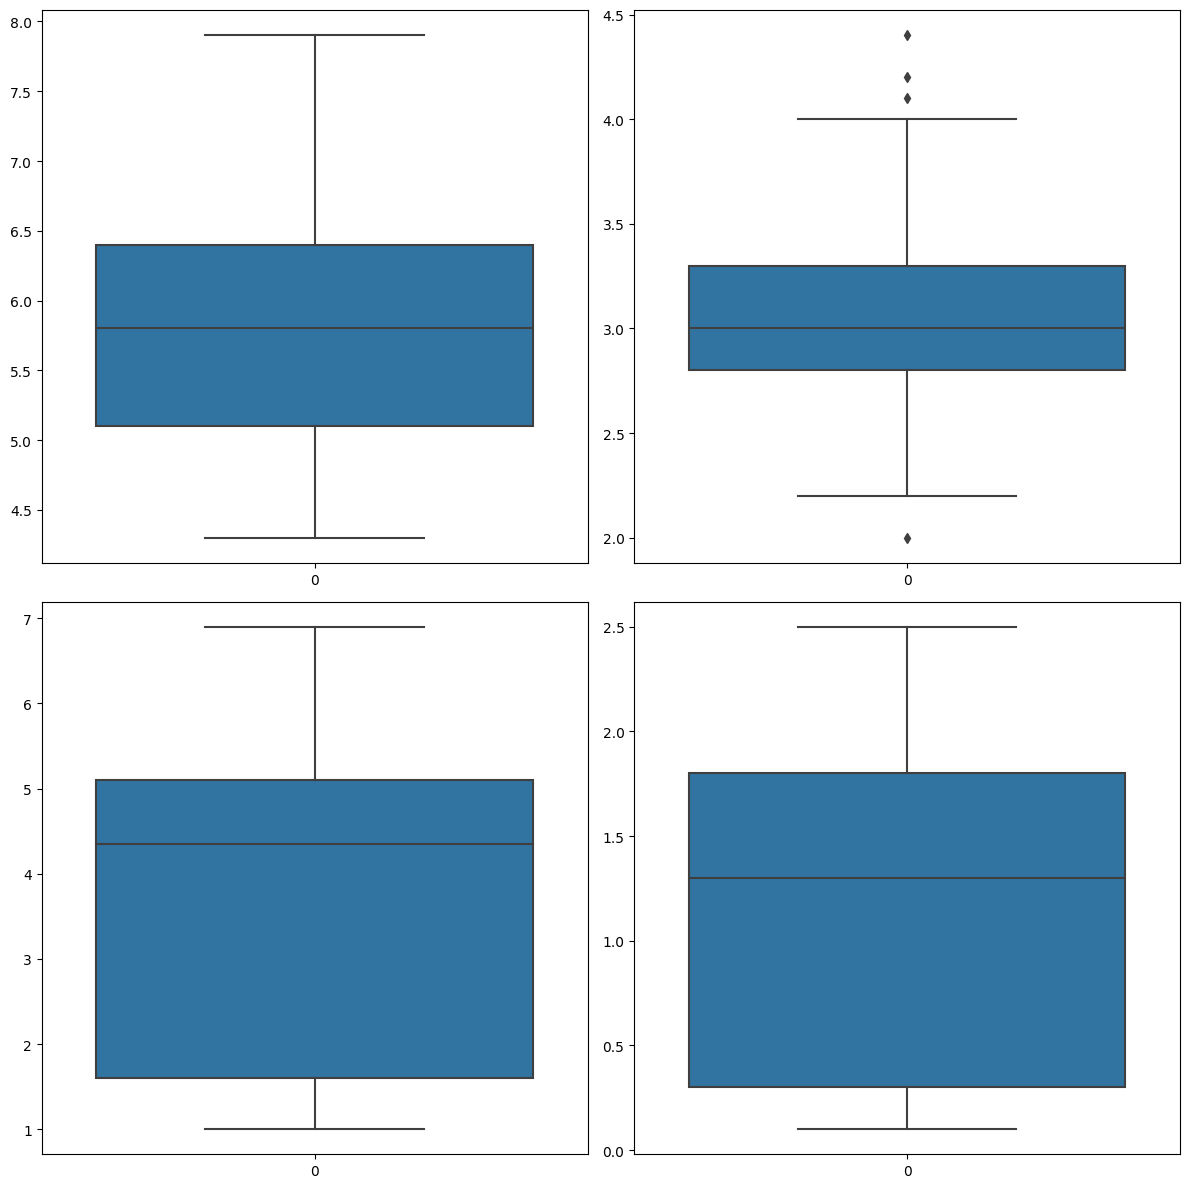

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12)) # Create a 2x2 grid of plots

plt1 = sns.boxplot(df['sepal_length'], ax=axes[0,0]) # Show the boxplot of the sepal length
plt2 = sns.boxplot(df['sepal_width'], ax=axes[0,1]) # Show the boxplot of the sepal width 
plt1 = sns.boxplot(df['petal_length'], ax=axes[1,0]) # Show the boxplot of the petal length
plt2 = sns.boxplot(df['petal_width'], ax=axes[1,1]) # Show the boxplot of the petal width

plt.tight_layout() # Show the plots without overlapping each other

{'whiskers': [<matplotlib.lines.Line2D at 0x2901470e3d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2901470f690>,
 'boxes': [<matplotlib.lines.Line2D at 0x290146d1e50>],
 'medians': [<matplotlib.lines.Line2D at 0x29014720890>],
 'fliers': [<matplotlib.lines.Line2D at 0x29014721010>],
 'means': []}

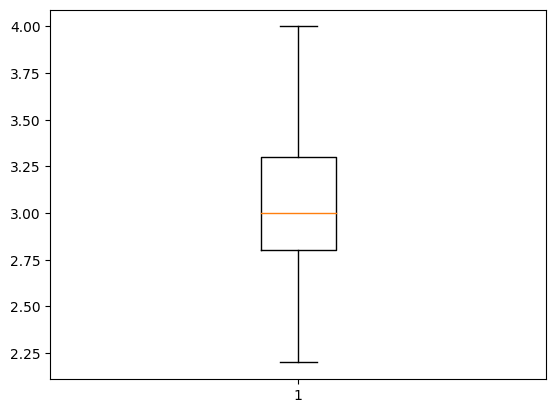

In [46]:
# Deal with outliers

Q1 = df.sepal_width.quantile(0.25)
Q3 = df.sepal_width.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.sepal_width >= Q1 - 1.5*IQR) & (df.sepal_width <= Q3 + 1.5*IQR)]

plt.boxplot(df.sepal_width) # Show the boxplot of the sepal width

<Axes: xlabel='species', ylabel='sepal_length'>

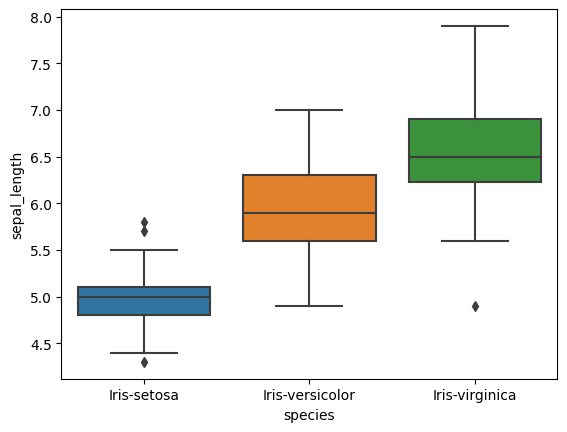

In [47]:
sns.boxplot(x = 'species', y = 'sepal_length', data = df) # Show the boxplot of the sepal length and species

## Dist Plot
Dist plots are used to compare different groups of data. They are also called distribution plots.

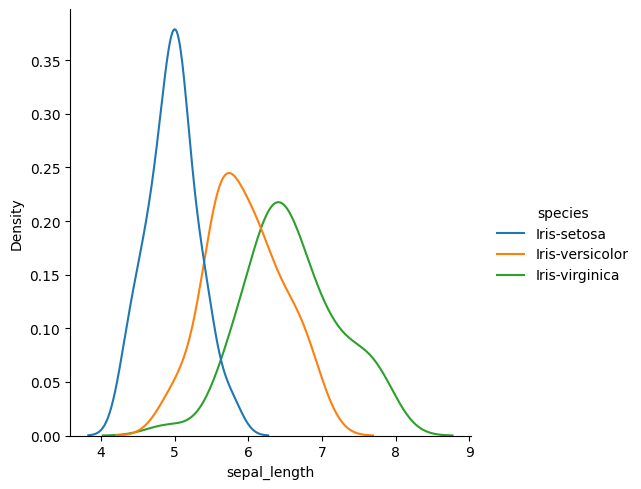

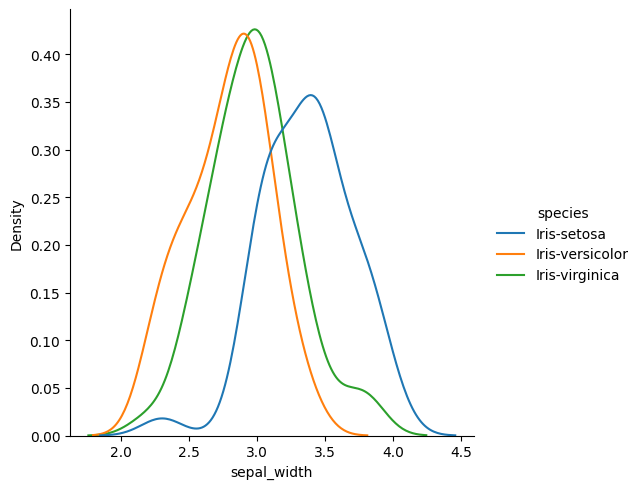

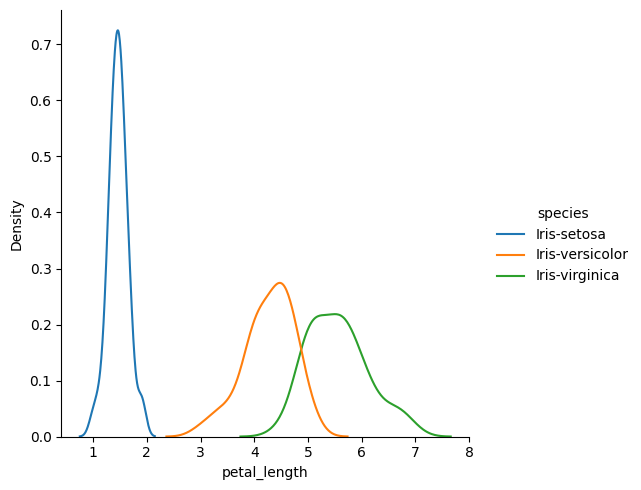

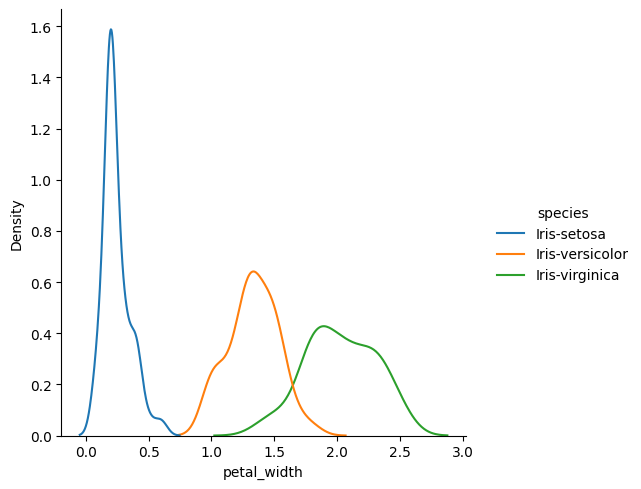

In [48]:
# Show the distplot of the each numeric column and the species

sns.displot(data=df, x="sepal_length", hue="species", kind="kde") 
sns.displot(data=df, x="sepal_width", hue="species", kind="kde")
sns.displot(data=df, x="petal_length", hue="species", kind="kde")
sns.displot(data=df, x="petal_width", hue="species", kind="kde")

## Heat Map
Heat maps are used to find the correlation between different features in a dataset.

<Axes: >

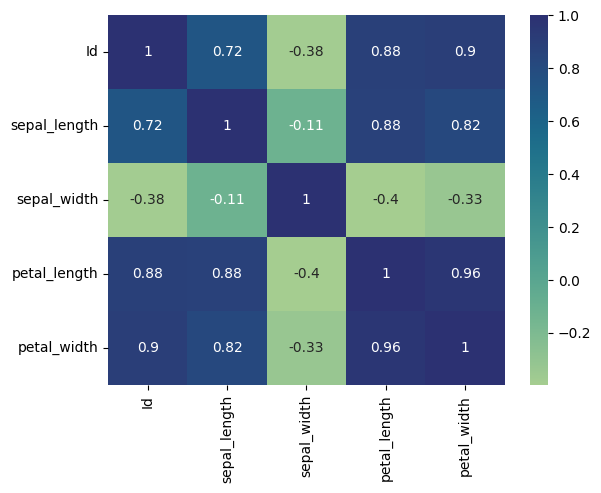

In [49]:
sns.heatmap(df.corr(numeric_only=True), cmap='crest', annot=True) # Show the heatmap of the correlation between the numeric columns

## Scatter Plot
Scatter plots help us visualize the relationship between two continuous variables.

<Axes: xlabel='petal_length', ylabel='sepal_length'>

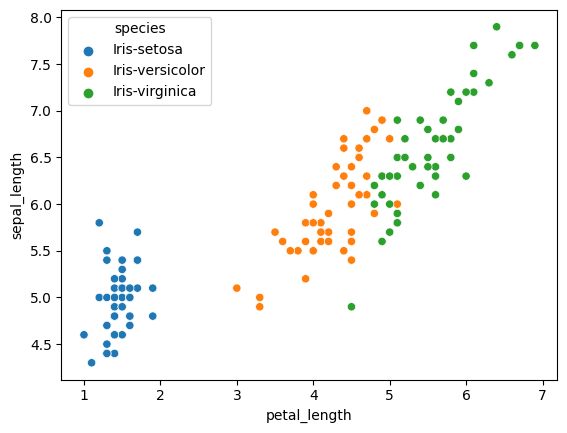

In [50]:
sns.scatterplot(y = df['sepal_length'], x = df['petal_length'], hue = df['species']) # Show the scatterplot of the sepal length and petal length

<Axes: xlabel='petal_width', ylabel='sepal_width'>

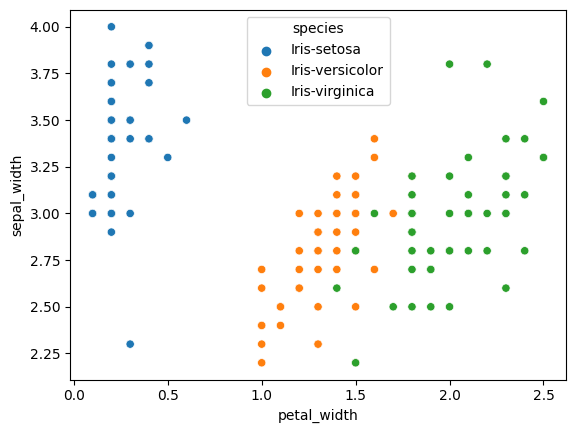

In [51]:
sns.scatterplot(y = df['sepal_width'], x = df['petal_width'], hue = df['species']) # Show the scatterplot of the sepal width and petal width

## Pair Plot
Pair plots help us visualize the relationship between multiple variables at once.

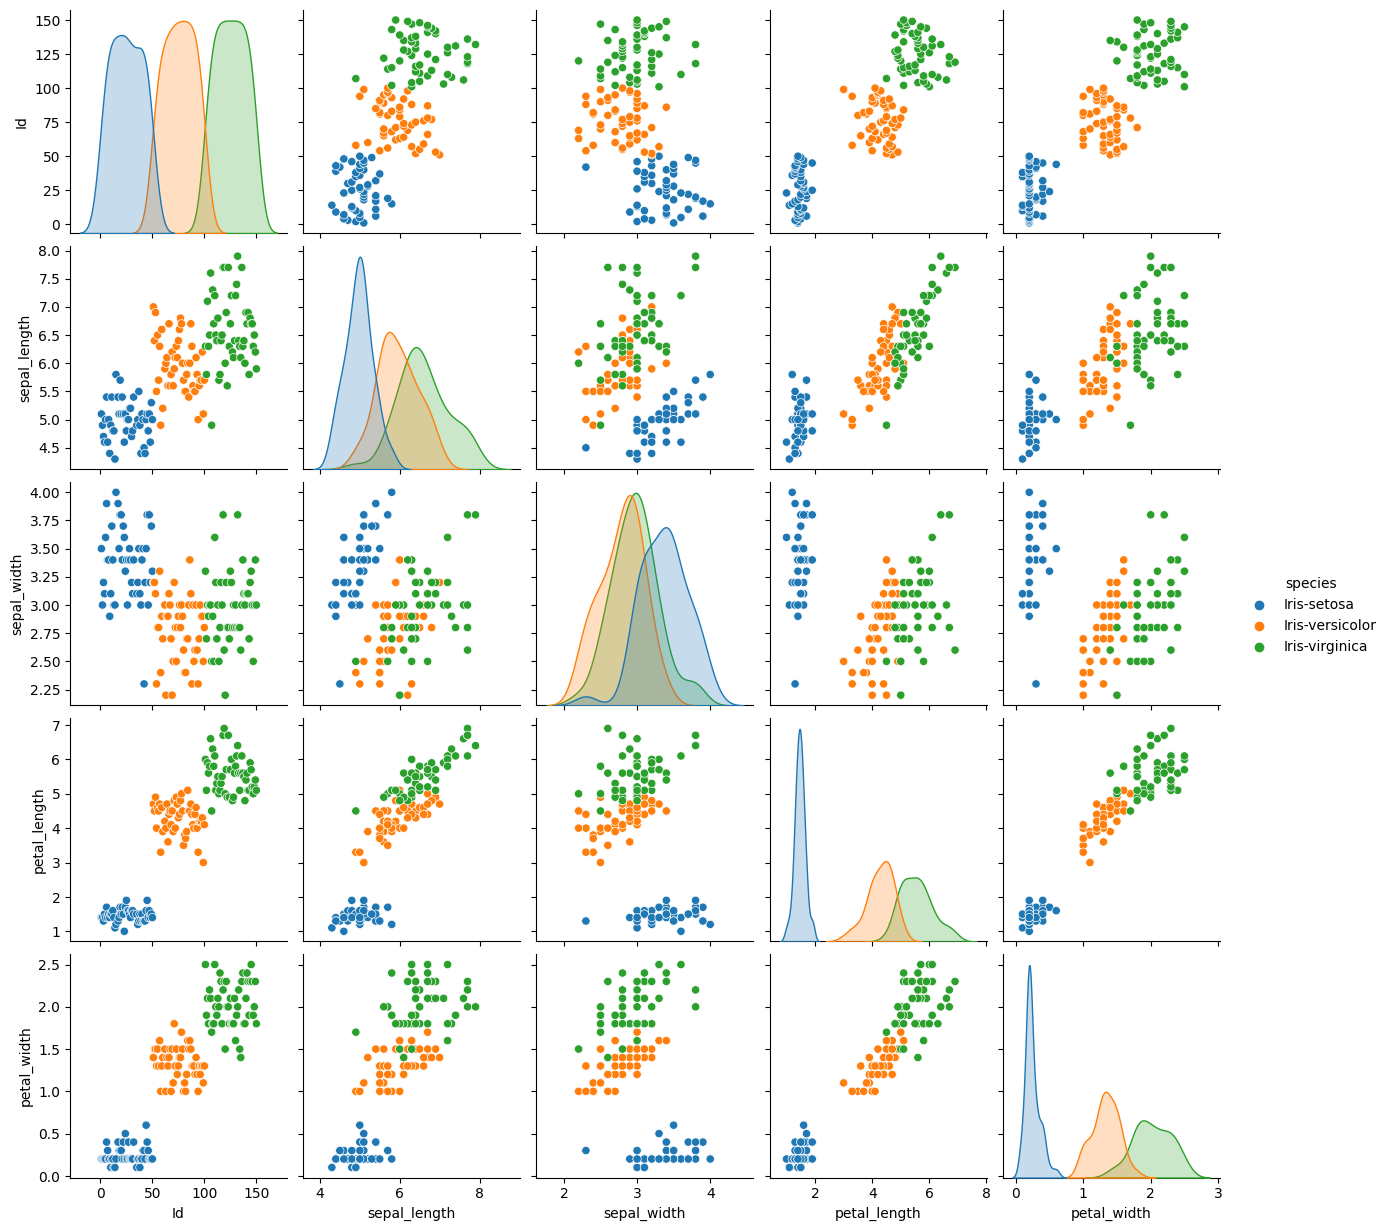

In [52]:
sns.pairplot(df, hue = 'species') # Show the pairplot of the data

## Train Test Splits
Train test splits are used to split the dataset into training and testing sets.

In [54]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] # Create the X matrix of features
y = df['species'] # Create the y vector of labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training and testing sets

print(X_train.shape) # Show the shape of the training set
print(X_test.shape) # Show the shape of the testing set

(116, 4)
(30, 4)


## Logistic Regression
Logistic regression is a classification algorithm used to predict the probability of a target variable.

In [56]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [59]:
prediction = model.predict(X_test) # Make predictions on the testing set
print('The accuracy of the Logistic Regression model is', metrics.accuracy_score(prediction, y_test)*100, '%') # Show the accuracy of the model

The accuracy of the Logistic Regression model is 93.33333333333333 %


## Evaluation Metrics
Evaluation metrics are used to evaluate the performance of a machine learning model.

In [60]:
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.88      0.88      0.88         8
 Iris-virginica       0.90      0.90      0.90        10

       accuracy                           0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30

